In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.stats
import pandas as pd
import datetime as dt
import numpy_financial as npf
import yfinance as yf
from scipy.optimize import minimize
plt.style.use('ggplot')
import statsmodels.api as sm
from yahoo_fin import stock_info as si

import fin_func as ff

In general the derivative pricing follows no-arbitrage rule, in other words, the price of derivative should equal the discounted future cash flow.

**Pricing** is for price of underlying assets (no arbitrage principle), **valuation** is for pricing of contract (risk neutrality).

**Risk neutrality** is a vital assumption, because there are three types of investors in market: _risk-averse_, _risk-prone_ and _risk-neutral_ investors. Each of them will have their own view of future asset price, therefore a different discount rate too. However this could cause different prices in financial markets which will be arbitraged away immediately. With this fact, all investors converge their valuation approaches based on risk-neutrality.

Ris neutral investor don't expect risk premium, which guarantees the pay-off can be discounted by _risk-free rate_.

# <font face="gotham" color="purple"> Forward </font>

A forward is contract traded privately between two parties agreed on a price in a future date. 

To understand forward, consider this example. 

You plan to make a business on breeding cats, you have two options:
1. buy new-born small kittens, raise them till they can give birth
2. buy older cat which can be breeding right away

The first option imposes _cost of carry_ (net cost) for you, such as insurance, food and house etc. The second option frees you from those costs, but seller will mark up the cats price with those costs they had.

Forward price formula

$$
F=S_0 e^{(r-q) T}-\sum_{i=1}^N D_i e^{(r-q)\left(T-t_i\right)}
$$
where
$F$ is the forward price to be paid at time $T$<br>
$e^x$ is the exponential function (used for calculating continuous compounding interests)<br>
$r$ is the risk-free interest rate<br>
$q$ is the convenience yield<br>
$S_0$ is the spot price of the asset (i.e. what it would sell for at time 0)<br>
$D_i$ is a dividend that is guaranteed to be paid at time $t_i$ where $0<t_i<T$.

# <font face="gotham" color="purple"> Options</font>

## <font face="gotham" color="purple"> Call Options</font>

**Call option** is the right to buy a particular asset for an agree price $E$ at time $T$ in the future.

For instance, you bought a call option to buy a share of Lululemon in $T=3$ months (expiry) at price of $K=\$350$ (strike price). If today Lululemon's price is $P=\$200$, i.e. $P<K$, is the called **out of money**, $P=K$ **at the money** and $P>K$ **in the money**.

At the expiry, the option's price is obvious, only two possibilities 
$$
\max{(S-K, 0)}
$$
that means equals either asset price minus strike price, or zero.

## <font face="gotham" color="purple"> Put Options</font>

**Put option** is the right to sell a particular asset for an agree price $E$ at time $T$ in the future.

For instance, you bought a put option to sell a share of Lululemon in $T=3$ months (expiry) at price of $K=\$200$ (strike price). Today Lululemon's price is $\$350$.

At the expiry, the option's price has only two possibilities 
$$
\max{(E-K, 0)}
$$
that means equals either strike price minus asset price, or zero.

## <font face="gotham" color="purple"> American vs European Options</font>

The American options can be exercised at any $t<T$ time before expiry, in contrast the European options can only be exercised at $T$ time on expiry.

Some literature differentiate continuous and discrete process by denoting $X(t)$ or $X_t$, we will not differentiate the notation, unless it's necessary.

## <font face="gotham" color="purple">Random Walk and Wiener Processes</font>

Using mathematical jargon to define a stochastic process, that a stochastic process is defined on a probability space $(\Omega, F, P)$, where $\Omega$ is nonempty sample space, $F$ is a $\sigma$-algebra (power set of all possible sets of $\Omega$) and $P$ a probability measure. 

The **Wiener process** is stochastic process which is denoted as $W_t$, the process is defined as
$$
\Delta W_t = W_{t+\Delta t}-W_t = \epsilon \sqrt{\Delta t}
$$

$$
W_{t+\Delta t}-W_t \sim N(0, \Delta t)
$$

A **geometric random walk** model is defined as
$$
\Delta S = \mu S\Delta t + \sigma S \Delta W = \mu S\Delta t + \sigma S \epsilon \sqrt{\Delta t}
$$
where

$\Delta S$ : changes in stock price, $S_{t+\Delta t}$ <br>
$\mu S\Delta t$ : $\mu$ expected return of rate, deterministic trend <br>
$\sigma S \Delta W$ : $\sigma$ standard deviation of stock, $\epsilon$ follows standard normal distribution
This is the fundamental model of derivative pricing models.

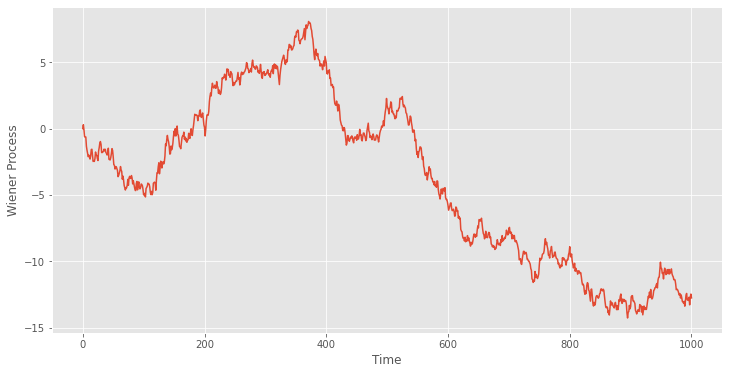

In [2]:
def wiener_process(dt=.1, x0=0, n=1000):
    W = np.zeros(n+1)
    t = np.linspace(x0, n, n+1)
    W[1:n+1] = np.cumsum(np.random.normal(0, np.sqrt(dt),n))
    return t, W

def plot_process(t, w):
    fig, ax = plt.subplots(figsize=(12,6))
    ax.plot(t, W)
    ax.set_xlabel('Time')
    ax.set_ylabel('Wiener Process')
    plt.show
    
if __name__=='__main__':
    t, W = wiener_process()
    plot_process(t, W)

The **Brownian motion** , sometimes also know as **Standard Wiener Process**, is a fractal in nature, the function will not be differentiable with a well-defined gradient. A standard Brownian motion has following characteristics

$$
\begin{aligned}
W(0) & =0 \text { a.s. } \\
E[W(t)] & =0(\mu=0) \\
E\left[W^2(t)\right] & =t\left(\sigma^2=1\right)
\end{aligned}
$$

However, due to fractal nature
$$
\frac{W_t}{t}
$$
does not exist.

# <font face="gotham" color="purple"> Itô Process</font>

An **Itô process** is a generalized Wiener process, $n$-dimensional representation is 
$$
X_t=X_0+\int_0^t a(X_s,s) d s+\int_0^t b(X_s, s) d W_s
$$

where $a$ and $b$ can be $n$-dimensional variable or constants, the former models the asset growth rate , the latter models the magnitude of volatility, $W_s$ a standard Brownian motion process. $X_t$ is the current stock price, $X_0$ the initial stock price. 

The first integral adds up growth in every period, i.e. accumulative growth
$$
E(X_t) = \int_0^t a_s d s
$$

The second integral adds up all volatilities from Wiener process.


$$
\text{Var}{(X_t)} = \int_0^t b_s d W_s
$$

The differential version of Itô Process is 
$$
d X_t=a\left(X_t, t\right) d t+b\left(X_t, t\right) d W_t \quad X_0=x
$$

where $a(X_t, t)$ and $b(X_t, t)$ mean growth rate $a$ and magnitude of Wiener process $b$ are functions of stock price $X_t$ and time $t$.

## <font face="gotham" color="purple"> Itô's Lemma </font>

The Itô's Lemma states that if any asset price being modeled by $d X_t=a\left(X_t, t\right) d t+b\left(X_t, t\right) d W_t$, if there will always be a function $F$ of $X$ and $t$ follows the form, which is derived from Taylor expansion of $F(X,Y)$ then substitution of $X$ by Itô process

$$
d F=\left(\frac{\partial F}{\partial X_t} \mu X+\frac{\partial F}{\partial t}+\frac{1}{2} \frac{\partial^2 F}{\partial X^2} (\sigma X)^2\right) d t+\frac{\partial F}{\partial X_t} b d W_t
$$

$F$ also follows Itô process with growth rate of $\frac{\partial F}{\partial X_t} a+\frac{\partial F}{\partial t}+\frac{1}{2} \frac{\partial^2 F}{\partial X^2} b^2$

### <font face="gotham" color="purple"> Forward Example </font>

Here we will demonstrate Itô's Lemma by a simple version of forward price formula, that is
$$
F=S e^{r(T-t)}
$$
Assuming the stock price is given by
$$
d S=\mu S d t+\sigma S d W
$$

According to Itô's Lemma, we prepare following 
$$
\begin{gathered}
\frac{\partial F}{\partial S}=e^{r(T-t)}, \quad \frac{\partial^2 F}{\partial S^2}=0, \quad \frac{\partial F}{\partial t}=-r S e^{r(T-t)}
\end{gathered}
$$


Plug in the Itô's Lemma
$$
d F=\left(e^{r(T-t)} \mu S-r S e^{r(T-t)}+0(\sigma X)^2\right) d t+e^{r(T-t)} \sigma S d W
$$

Substitute $F=S e^{r(T-t)}$

$$
d F=(\mu-r) F d t+\sigma F d W
$$

Itô's Lemma allows to make predictions of forward price based on stock (asset) price.

### <font face="gotham" color="purple"> Log Example </font>

Assume an $F$ function takes a natural log form
$$
F(S)=\log S(t)
$$

Prepare derivatives
$$
\begin{gathered}
\frac{\partial F}{\partial S}=\frac{1}{S(t)}, \quad \frac{\partial^2 F}{\partial S^2}=-\frac{1}{S(t)^2}, \quad \frac{\partial F}{\partial t}=0
\end{gathered}
$$

Plug into Itô's Lemma

$$
d F(S)=\frac{1}{S} d S-\frac{1}{2} \frac{1}{S^2} d S^2 
$$

Substitute $S$ by geometric Brownian motion process
$$
d F(S)=\frac{1}{S}(\mu S d t+\sigma S d W)-\frac{1}{2} \frac{1}{S^2} \sigma^2 S^2 d t \\
d F(S)=\left(\mu-\frac{1}{2} \sigma^2\right) d t+\sigma d W
$$

Integrate $dF(S)$ on both sides and apply natural log on $F(S)=\log S(t)$
$$
S(t)=S(0) e^{\left(\mu-\frac{1}{2} \sigma^2\right) t+\sigma W_t}
$$

So, the example means if $F(S)$ is a derivative of $S$, $S(t)$ can be obtained by Itô's Lemma.

Here's the code to simulate the log example, note that the simulated stock will never be able to cross $0$ line, which is a good feature for simulating assets price. 

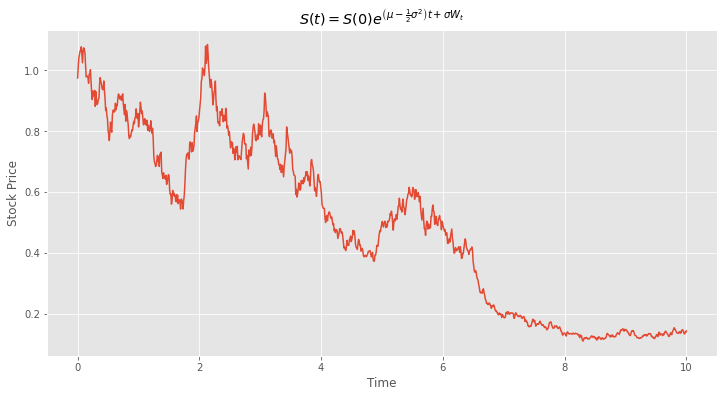

In [3]:
def sim_geometric_rw(S0, T=10, N=1000, mu=.1, sigma=.05):
    dt = T/N
    t = np.linspace(0, T, N)
    W = np.random.normal(0, 1, size=N) # standard Wiener process
    W = np.cumsum(W)*np.sqrt(dt) # scale the st.dev. into sqrt(t)
    F = (mu - .5*sigma)*t + sigma*W
    S = S0 * np.exp(F)
    return t, S

def plot_simu(t, S):
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(t, S)
    ax.set_xlabel('Time')
    ax.set_ylabel('Stock Price')
    ax.set_title(r'$S(t)=S(0) e^{\left(\mu-\frac{1}{2} \sigma^2\right) t+\sigma W_t}$')
    plt.show()
    
if __name__ == '__main__':
    time, data = sim_geometric_rw(S0=1, T=10, N=1000, mu=.1, sigma=.3)
    plot_simu(time, data)

## <font face="gotham" color="purple"> Options Pricing </font>

Denote an option's price as $V(S,t)$, where $S$ is the underlying stock price modeled by
$$
d S_t=a\left(S_t, t\right) d t+b\left(S_t, t\right) d W_t
$$

Give it a full Taylor expansion till $2$nd order
$$
{V}({S}+\Delta {S}, {t}+\Delta {t})={V}({S}, {t})+\frac{\partial {V}}{\partial {t}} \Delta {t}+\frac{\partial {V}}{\partial {S}} \Delta {S}+\frac{1}{2}\left(\underbrace{\frac{\partial^2 {~V}}{\partial {t}^2} \Delta {t}^2+2 \frac{\partial^2 {~V}}{\partial {S} \partial {t}} \Delta {S} \Delta {t}}_{\approx 0}+\frac{\partial^2 {~V}}{\partial {S}^2} \Delta {S}^2\right)
$$

Rearrange the equation, i.e. moving $V(S, t)$ to the left
$$
 dV( {S},  {t})=\frac{\partial  {V}}{\partial  {t}}  {dt}+\frac{\partial  {V}}{\partial  {S}}  {dS}+\frac{1}{2} \frac{\partial^2  {~V}}{\partial  {S}^2}  {dS}^2
$$

The last term $dS^2$ is actually $(dS)^2$, but usually parentheses are omitted to avoid jamming notation, so plug in the geometric Brownian motion model into $dS$ and omit arguments of $a$ and $b$
$$
d S^2=(a d t+b d W)^2=\underbrace{a^2 d t^2+2 a b d t d W}_{\approx 0}+b^2 d W^2=b^2 d W^2
$$

Recall the Wiener process definition that
$$
E(dW^2) = dt
$$

Therefore
$$
d V(S, t)=\frac{\partial V}{\partial t} d t+\frac{\partial V}{\partial S} d S+\frac{1}{2} b^2 \frac{\partial^2 V}{\partial S^{2}} d t
$$

# <font face="gotham" color="purple"> Black-Scholes Model </font>

Black and Scholes (1973) shows that even systematic risk can be eliminated by including risky assets, which generates **market-neutral strategy** such as **delta-hedging** and **pairs-trading**.

In a full-fledged option's price function, there are following parameters
$$
V(S, t, \sigma, \mu, K, T, r)
$$
$S$: stock price<br>
$t$: time<br>
$\sigma$: volatility<br>
$\mu$: mean of stock price growth<br>
$K$: strike price<br>
$T$: expiry<br>
$r$: risk-free rate<br>

This is a simple portfolio to eliminate the risks
$$
\pi = V(S, t) - \Delta S
$$
which means long call option, short a certain amount of stocks. Because there are some level of correlation between stock price and options pay-off, we can eliminate all risks.

Use Itô's Lemma 

$$
d V(S, t)=\frac{\partial V}{\partial t} d t+\frac{\partial V}{\partial S} d S+\frac{1}{2} \sigma^2 S^2 \frac{\partial^2 V}{\partial S^2} d t
$$

Plug into portfolio 
$$
{d} \pi=\frac{\partial {V}}{\partial {t}} {dt}+\frac{\partial {V}}{\partial {S}} {dS}+\frac{1}{2} \sigma^2 {~S}^2 \frac{\partial^2 {~V}}{\partial S^2} {dt}-\Delta {d} S
$$

Arrange terms

$$
d \pi=\underbrace{\left(\frac{\partial V}{\partial t}+\frac{1}{2} \sigma^2 S^2 \frac{\partial^2 V}{\partial S^2}\right) d t}_{\text{deterministic}}+\underbrace{\left(\frac{\partial V}{\partial S}-\Delta\right) d S}_{\text{stochastic}}
$$

## <font face="gotham" color="purple"> Dynamic Delta Hedging </font>

The Delta-hedging strategy aims to achieve 
$$
\frac{\partial V}{\partial S}=\Delta
$$
which renders the stochastic part $0$. 

To maintain this hedging position, $\Delta$ has to be dynamically balanced. Once this condition is achieved, there is only riskless part in the portfolio, 
$$
d\pi = r \pi dt
$$

Use the deterministic part and replace $\pi$ by $V(S, t) - \Delta S$ assuming $\frac{\partial V}{\partial S}=\Delta$

$$
d\pi = \left(\frac{\partial {V}}{\partial {t}}+\frac{{1}}{{2}} \sigma^2 S^2 \frac{\partial^2 {V}}{\partial S^2}\right) {d t}={r}\left({V}-{S} \frac{\partial {V}}{\partial {S}}\right) {d t}
$$

Use the last two terms and arrange them

<div style="background-color:Bisque; color:DarkBlue; padding:30px;">
\begin{gathered}
\frac{\partial V}{\partial t}+\frac{1}{2} \sigma^2 S^2 \frac{\partial^2 V}{\partial S^2}+r S \frac{\partial V}{\partial S}-r V=0
\end{gathered}
</div> 

This is the famous **Black-Scholes model**, which is a parabolic partial differential equation (connected heat equation in physics).

Without solving the PDE, here are the solutions for call and put option
$$
\begin{align}
\text{Call: }&S(0) \Phi\left(d_1\right)-E e^{-r(T-t)} \Phi\left(d_2\right) \\
\text{Put: }&-S(0) \Phi\left(-d_1\right)+E e^{-r(T-t)}\Phi\left(-d_2\right) \\
\end{align}
$$
where $\Phi(\cdot)$ is a standard normal distribution CDF (to differentiate PDF $N(\cdot)$)
$$
d_1=\frac{\log \left(\frac{S(0)}{E}\right)+\left({r}+\frac{1}{2} \sigma^2\right)({T}-{t})}{\sigma \sqrt{{T}-{t}}},\qquad
{d}_2={d}_{{1}}-{\sigma} \sqrt{{T}-{t}}
$$

## <font face="gotham" color="purple">The Greeks </font>

We have seen **Delta** from above, 
$$
\Delta = \frac{\partial V}{\partial S}
$$
which measures the sensitivity of option.

**Gamma** is the derivative of $\Delta$
$$
\Gamma = \frac{\partial^2 V}{\partial S^2}
$$
which measures how often a position must be re-hedged in order to maintain a delta-neutral position.

**Theta** is the rate of change of option over time
$$
\Theta = \frac{V}{t}
$$

**Vega** measures the sensitivity of option over stock's volatility
$$
\mathcal{V}=\frac{\partial V}{\partial \sigma}
$$
However note that $\mathcal{V}$ is not real Greek letter, it is simply a larger size $\nu$ (nu).

With these Greeks, we can rewrite Black-Scholes as
$$
\begin{gathered}
\Theta+\frac{1}{2} \sigma^2 S^2 \Gamma+r S \Delta -r V=0
\end{gathered}
$$

## <font face="gotham" color="purple"> Implementation </font>

We will use solution of Black-Scholes to evaluate European vanilla options

$$
\begin{align}
\text{Call: }&S(0) \Phi\left(d_1\right)-E e^{-r(T-t)} \Phi\left(d_2\right) \\
\text{Put: }&-S(0) \Phi\left(-d_1\right)+E e^{-r(T-t)} \Phi\left(-d_2\right) \\
\end{align}
$$

In [4]:
def call_option_price(S, K, T, risk_free, sigma):
    d1 = (np.log(S/K) + (risk_free + (sigma**2)/2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T) 
    return S*sp.stats.norm.cdf(d1) - K*np.exp(-risk_free*T)*sp.stats.norm.cdf(d2)

def put_option_price(S, K, T, risk_free, sigma):
    d1 = (np.log(S/K) + (risk_free + (sigma**2)/2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T) 
    return -S*sp.stats.norm.cdf(-d1) + K*np.exp(-risk_free*T)*sp.stats.norm.cdf(-d2)

if __name__ == '__main__':
    S0 = 95
    K = 100
    T = .5
    risk_free = .05
    sigma = .2
    print('Call option price: {}'.format(call_option_price(S0, K, T, risk_free, sigma)))
    print('Put option price: {}'.format(put_option_price(S0, K, T, risk_free, sigma)))

Call option price: 4.254540648120496
Put option price: 6.78553185095376


## <font face="gotham" color="purple"> MCMC for Stock Simulation </font>

First, we simulate stock price with the formula below
$$
S(t)=S(0) e^{\left(\mu-\frac{1}{2} \sigma^2\right) t+\sigma W_t}
$$

Prediction for 1 year later: 252    54.720872
Name: mean, dtype: float64


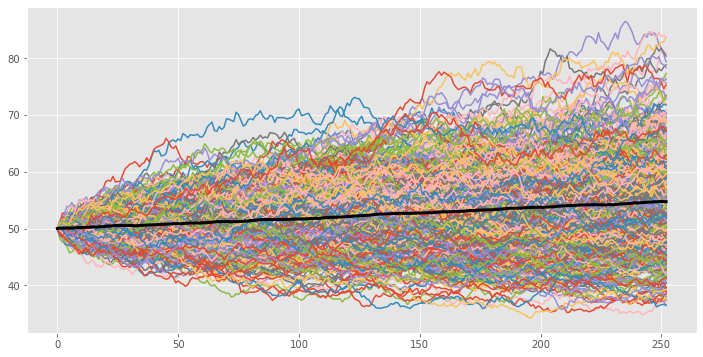

In [5]:
num_of_simu = 500
def stock_monte_carlo(S0, mu, sigma, N=252): # 252 trading days a year
    results = []
    for i in range(num_of_simu):
        prices = [S0] 
        for j in range(N):
            # simulate day by day, so no t in function
            stock_price = prices[-1] * np.exp((mu-(sigma**2)/2)+sigma*np.random.normal())
            prices.append(stock_price)
        results.append(prices)
    simu_data = pd.DataFrame(results)
    simu_data = simu_data.T
    simu_data['mean'] = simu_data.mean(axis=1)
    print('Prediction for 1 year later: {}'.format(simu_data['mean'].tail(1)))
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(simu_data)
    ax.plot(simu_data['mean'], lw=3, color ='k')
    plt.show()
if __name__ == '__main__':
    stock_monte_carlo(S0=50, mu=.0003, sigma=.01)

## <font face="gotham" color="purple"> MCMC for Options Pricing </font>

If we assume risk-neutrality, we can use risk-free rate $r$ to replace $\mu$
$$
S(t)=S(0) e^{\left(r-\frac{1}{2} \sigma^2\right) t+\sigma \sqrt{t}N(0,1)}
$$

In [24]:
class OptionPricing:
    def __init__(self, S0, K, T, rf, sigma, iterations):
        self.S0 = S0
        self.K = K
        self.T = T
        self.rf = rf
        self.sigma = sigma
        self.iterations = iterations
    def call_option_simu(self):
        # placeholder for max(0, S-K)
        option_data = np.zeros([self.iterations, 2])
        W = np.random.normal(0, 1, [1, self.iterations]) # wienar process
        stock_price = self.S0 * np.exp((self.rf-.5*self.sigma**2)*self.T+self.sigma*np.sqrt(self.T)*W)
        option_data[:, 1] = stock_price - self.K
        average = np.sum(np.amax(option_data, axis=1))/self.iterations
        return np.exp(-self.rf*self.T)*average
    def put_option_simu(self):
        # placeholder for max(0, K-S)
        option_data = np.zeros([self.iterations, 2])
        W = np.random.normal(0, 1, [1, self.iterations]) # wienar process
        stock_price = self.S0 * np.exp((self.rf-.5*self.sigma**2)*self.T+self.sigma*np.sqrt(self.T)*W)
        option_data[:, 1] = self.K -stock_price
        average = np.sum(np.amax(option_data, axis=1))/self.iterations
        return np.exp(-self.rf*self.T)*average
    
if __name__=='__main__':
    model = OptionPricing(S0=100, K=110, T=.5, rf=0.03, sigma=0.2, iterations=1000)
    print('Value of call option: {:.2f}.'.format(model.call_option_simu()))
    print('Value of put option: {:.2f}.'.format(model.put_option_simu()))

Value of call option: 2.52.
Value of put option: 11.41.


# <font face="gotham" color="purple"> Stochastic Calculus </font>

## Brownian Motion

Stock price sometimes assumed following lognormal distribution, because of compound effect, simply speaking growing $2\%$ for $10$ days is larger decreasing $2\%$ for $10$ days.

In [6]:
print('Increaseing 2% for 10 days: {:.4f}'.format(1.02**10 - 1))
print('Decreasing 2% for 10 days: {:.4f}'.format(1 - .98**10))

Increaseing 2% for 10 days: 0.2190
Decreasing 2% for 10 days: 0.1829


In [7]:
stock_msft = ff.download_data(['C'], dropna=True, start_date='1990-01-01', end_date=dt.datetime.today())

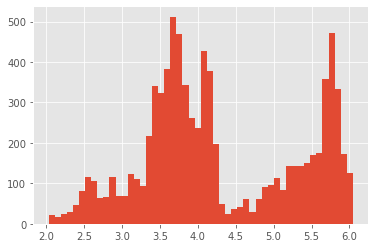

In [8]:
log_stock_msft = np.log(stock_msft)
plt.hist(log_stock_msft, bins=50)
plt.show()

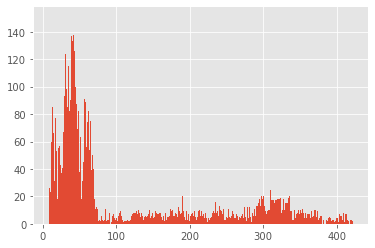

In [9]:
plt.hist(stock_msft, bins=500)
plt.show()

Riemann integral is the textbook integral, shortcomings are cumbersome to handle higher dimensions, continuity assumption can mess up the integration.